In [9]:
import pandas as pd
import seaborn as sns

In [10]:
df=pd.read_csv("C:\\Users\\bhard\\ROHAN [ML & DS]\\UDEMY ML&DS\\08-Linear-Regression-Models\\Advertising.csv")

In [11]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [12]:
y=df['sales']
df['total_spend']=df['TV']+df['radio']+df['newspaper']

In [13]:
x=df['total_spend']

<Axes: xlabel='total_spend', ylabel='sales'>

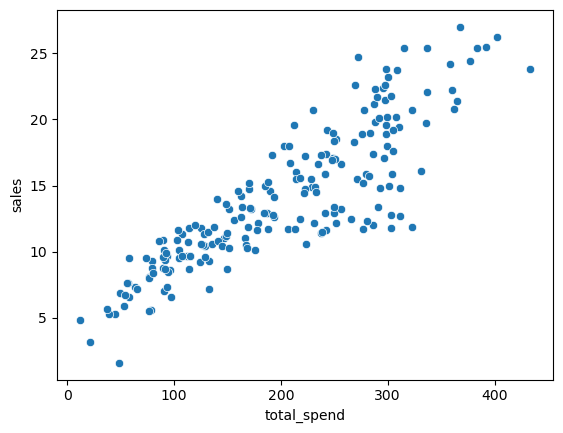

In [14]:
sns.scatterplot(data=df,x='total_spend',y='sales')

<Axes: xlabel='total_spend', ylabel='sales'>

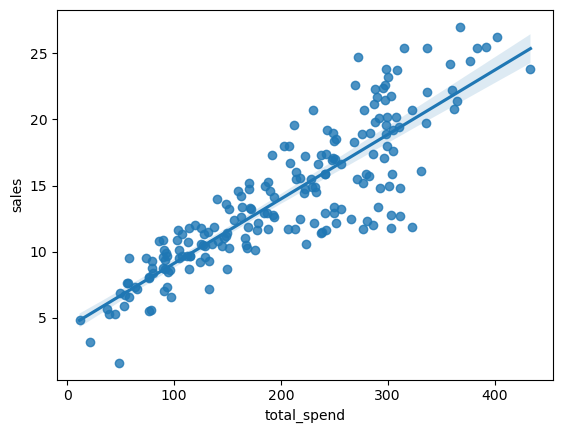

In [15]:
sns.regplot(data=df,x='total_spend',y='sales')

In [16]:
#gonna use OLS [y=b1x+x0] using polyfit
import numpy as np
np.polyfit(x,y,deg=1) #degree = 1 linear equation

array([0.04868788, 4.24302822])

In [17]:
potential=np.linspace(0,500,100)

In [18]:
pred=0.0486788*potential + 4.2430822

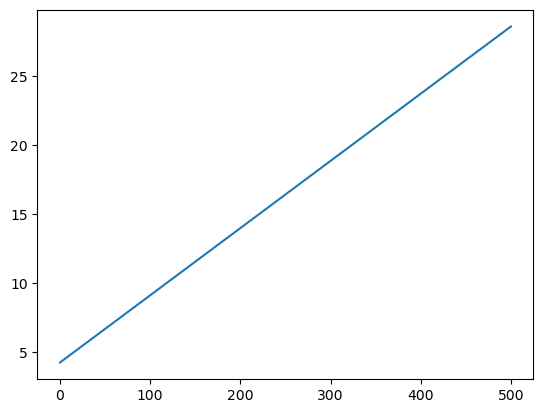

In [19]:
import matplotlib.pyplot as plt
plt.plot(potential,pred)

In [20]:
spend=200
pred=0.0486788*spend + 4.2430822

In [21]:
pred

13.9788422

**Polynomial Regression**

In [22]:
y1=df['sales']

In [23]:
x1=df.drop('sales',axis=1)

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
poly_conv=PolynomialFeatures(degree=2,include_bias=False)

In [26]:
poly_conv.fit(x1)

PolynomialFeatures(include_bias=False)

In [27]:
polygamy=poly_conv.transform(x1)

In [28]:
polygamy.shape  #a,b,c,d,ab,bc,ad,ca,bd,cd,a2,b2,c2,d2 polynomial 

(200, 14)

In [29]:
x1.shape

(200, 4)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x1_train,x1_test,y1_train,y1_test=train_test_split(polygamy,y,test_size=0.3,random_state=101)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model=LinearRegression()

In [34]:
model.fit(x1_train,y1_train)

LinearRegression()

In [35]:
test_prediction=model.predict(x1_train)

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [37]:
test_prediction.shape

(140,)

**BIAS VARIANCE:UnderOverfitting**


1.Poly nomial
2.split data into test and train
3.fit into model - train
4.then compare RMSE of test and train

In [38]:
ds=pd.read_csv("C:\\Users\\bhard\\ROHAN [ML & DS]\\UDEMY ML&DS\\08-Linear-Regression-Models\\Advertising.csv")

In [39]:
ds


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [40]:
X=ds.drop('sales',axis=1)
y=ds['sales']
X


,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [41]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

In [42]:
train_rmse_error=[]
test_rmse_error=[]

In [43]:
for d in range(1,10):
    poly_converter=PolynomialFeatures(degree=d,include_bias=False)
    poly_features=poly_converter.fit_transform(X)
    X_train,X_test,y_train,y_test=train_test_split( poly_features,y,test_size=0.3,random_state=101)

    model=LinearRegression()
    model.fit(X_train,y_train)
    train_pred=model.predict(X_train)
    test_pred=model.predict(X_test)
    train_rmse=np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse=np.sqrt(mean_squared_error(y_test,test_pred))
    train_rmse_error.append(train_rmse)
    test_rmse_error.append(test_rmse)
    

In [44]:
#now plot the graph of error and degree
import matplotlib.pyplot as plt

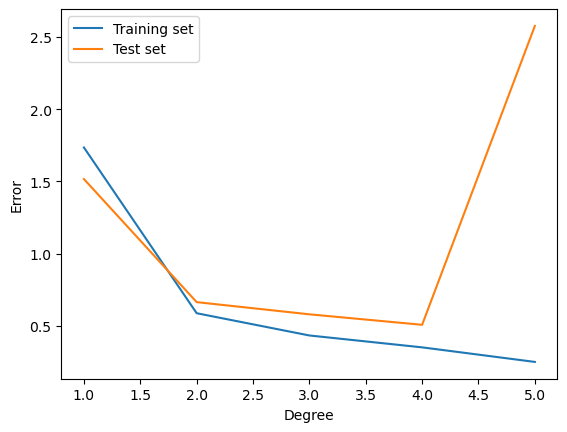

In [45]:
plt.plot(range(1,6),train_rmse_error[:5],label='Training set')
plt.plot(range(1,6),test_rmse_error[:5],label='Test set')
plt.ylabel('Error')
plt.xlabel('Degree')
plt.legend()

In [46]:
#CHOOSE THE SECOND OR THIRD DEGREE AS RISK IS LOW OF ERROR THERE THAN THE 4TH DEGREE

In [47]:
#model  deployment : Polynomial Regression
final_conv=PolynomialFeatures(degree=3,include_bias=False)
final_model=LinearRegression()

In [48]:
final_x=final_conv.fit_transform(X)
final_model.fit(final_x,y)

LinearRegression()

In [49]:
from joblib import dump,load

In [50]:
dump(final_model, 'sales_poly_model.joblib') 

['sales_poly_model.joblib']

In [51]:
dump(final_conv,'poly_converter.joblib')

['poly_converter.joblib']

In [52]:
loaded_poly = load('poly_converter.joblib')
loaded_model = load('sales_poly_model.joblib')

In [53]:
campaign = [[149,22,12]]

In [54]:
campaign_poly = loaded_poly.transform(campaign)

C:\Users\bhard\anaconda3\envs\Proj_new\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [55]:
campaign_poly

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [56]:
final_model.predict(campaign_poly)

array([14.64501014])

## FEATURE SCALING

In [57]:
ds=pd.read_csv("C:\\Users\\bhard\\ROHAN [ML & DS]\\UDEMY ML&DS\\08-Linear-Regression-Models\\Advertising.csv")

In [58]:
X= ds.drop('sales',axis=1)

In [59]:
y=ds['sales']

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [61]:
poly_converter=PolynomialFeatures(degree=3,include_bias=False)

In [62]:
poly_features=poly_converter.fit_transform(X)

In [63]:
X.shape

(200, 3)

In [64]:
poly_features.shape

(200, 19)

In [65]:
X_train,X_test,y_train,y_test=train_test_split(poly_features,y,test_size=0.3,random_state=101)

In [66]:
from sklearn.preprocessing import StandardScaler


In [67]:
scaler=StandardScaler()

In [68]:
scaler.fit(X_train)
scaler.fit(X_test)

StandardScaler()

In [69]:
X_train=scaler.transform(X_train)

In [70]:
X_test=scaler.transform(X_test)

In [71]:
X_train #these are the scaled features - values are quite shorter

array([[ 0.64814877, -0.30211298,  1.62728088, ..., -0.17144523,
         0.46592759,  1.00279395],
       [ 1.72283103,  1.34273674,  1.89973504, ...,  2.37749932,
         2.29372612,  1.43116549],
       [-0.63828233, -1.53240708, -0.89626998, ..., -0.68447306,
        -0.55458602, -0.39692639],
       ...,
       [ 1.17865929, -1.25826546,  0.34093991, ..., -0.67016654,
        -0.48285503, -0.15211317],
       [ 0.89291221,  0.07232435, -1.12852599, ..., -0.63133296,
        -0.54965199, -0.40046355],
       [ 0.30775682,  0.58048931,  1.05557378, ...,  0.53387044,
         0.58165029,  0.33188614]])

In [72]:
poly_features[0]

array([2.30100000e+02, 3.78000000e+01, 6.92000000e+01, 5.29460100e+04,
       8.69778000e+03, 1.59229200e+04, 1.42884000e+03, 2.61576000e+03,
       4.78864000e+03, 1.21828769e+07, 2.00135918e+06, 3.66386389e+06,
       3.28776084e+05, 6.01886376e+05, 1.10186606e+06, 5.40101520e+04,
       9.88757280e+04, 1.81010592e+05, 3.31373888e+05])

##                                                LASSO REGRESSION

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
from sklearn.linear_model import LassoCV

In [75]:
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)

In [76]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [78]:
lasso_cv_model.alpha_

0.4883315741129738

In [81]:
test_predictions = lasso_cv_model.predict(X_test)

In [82]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [83]:
MAE

0.6584757767987853

In [84]:
RMSE

1.1387870411024548

In [85]:
lasso_cv_model.coef_

array([1.03235829, 0.        , 0.        , 0.        , 3.9314214 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

## RIDGE REGRESSION

In [87]:
from sklearn.linear_model import RidgeCV

In [93]:
ridge_model=RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')

In [96]:
ridge_model.fit(X_train,y_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [97]:
ridge_model.alpha_


0.1

In [99]:
test_pred1=ridge_model.predict(X_test)

In [100]:
MAE = mean_absolute_error(y_test,test_pred1)
MSE = mean_squared_error(y_test,test_pred1)
RMSE = np.sqrt(MSE)

In [103]:
MAE

0.43099238079137336

In [104]:
RMSE

0.6205222538985943

In [106]:
ridge_model.coef_

array([ 5.65450162,  0.58487722,  0.44056949, -6.15210278,  4.76411399,
       -0.9793253 , -1.16450855,  0.60673414, -0.08991871,  2.45102915,
       -1.46391474,  0.60676947,  0.76164284, -0.19180007,  0.10840832,
        0.45063629, -0.23179247, -0.07851642, -0.11693079])

## ELASTIC NET REGRESSION

In [128]:
from sklearn.linear_model import ElasticNetCV

In [129]:
elastic = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01) # 0 - Ridge , 1 - Lasso

In [130]:
elastic.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [131]:
elastic.alpha_ #underscore = the best value

0.0048833157411297375

In [132]:
elastic.l1_ratio_

1.0

In [133]:
test_prediction1= elastic.predict(X_test)

In [134]:
MAE = mean_absolute_error(y_test,test_prediction1)
MSE = mean_squared_error(y_test,test_prediction1)
RMSE = np.sqrt(MSE)

In [135]:
MAE

0.5651328098919807

In [136]:
RMSE

0.7475227119415035

In [138]:
elastic.coef_
#mix of lasso ridge

array([ 3.94830585e+00,  9.04189817e-01,  2.98465694e-01, -1.02373728e+00,
        2.24143464e+00, -2.81394970e-01, -2.82832483e-01,  1.07975268e-01,
        0.00000000e+00, -1.02813996e+00,  2.50324905e-01,  6.76025343e-02,
        1.30989183e+00,  1.15478226e-02,  1.61445215e-03, -4.28632003e-01,
        0.00000000e+00, -3.67945071e-03, -6.96490291e-02])

_ _ _ _
_____